## Assignment_1_v2

Показать на эксперименте, что верхняя оценка на вероятность коллизии композиционного хеша для строк выполняется O(1/m + L/p). Подробнее в материалах лекции.
Построить графики зависимости FPR от длинны строк L и простого модуля p.
Эксперименты провести для L = np.linspace(10, 100, 11) и 10 простых чисел p из интервала (100, 1000)
Для каждой точки выполнить 10 экспериментов, на графике отобразить стандартное отклонение оценки в каждой точке.

**Подсказки:**

Фиксируешь p и проводишь по 10 экспериментов для 11 разных L

Потом фиксируешь L и проводишь по 10 экспериментов для 10 разных p из указанного интервала

Только учти, что p - это простые числа

Затем  для каждого L считаешь среднее и стандартное отклонение FPR, и рисуешь их на графике

Затем  для каждого p считаешь среднее и стандартное отклонение FPR, и рисуешь их на другом  графике

Каждый эксперимент состоит из того, что ты генерируешь скажем 1000 разных строк длины L и смотришь совпадения хешей между ними. Соответственно твой FPR = # коллизий * 2 / (1000 *  (1000-1)). То есть ты делишь кол-во коллизий на кол-во всевозможных пар строк. Впринципе кол-во строк не принципиально

Да, все строки в эксперименте разные

Соответственно мы ожидаем рост коллизий с увеличением длинны строк не быстрее линейного

И уменьшение коллизий с ростом p по гиперболе

В каждом эксперименте seed с которым ты генерируешь строки должен быть разным

In [1]:
import numpy as np
import pandas as pd
import math
import random
from random import shuffle

from matplotlib import pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def hash_int(x, a=112, b=22, p=997):
    return (a*x + b) % p

def poly_hash(s, x=31, p=997):
    h = 0
    for j in range(len(s)-1, -1, -1):
        h = (h * x + ord(s[j]) + p) % p
    return h

def primes(n):
    arr = []
    for el in range(100, 1000):
        if (n > 2) and (n % 2 == 0):
            arr.append(all(n % i for i in range(3, int(np.sqrt(n)) + 1, 2)))
    
    primes = np.arange(100, 1000)[arr]
    return np.sort(primes[:n])

In [4]:
collisions = np.zeros((len(np.linspace(10, 100, 11)), 
                       len(list(primes(10)))), 
                      dtype=object)

In [5]:
def basis(L, p):
    set_ = set()
    res = ''
    
    while len(set_) < 1000:
        res = ''.join(random.choice('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ') for el in range(L))
        set_.add(res) 
    
    hashes = [hash_int(poly_hash(s, x=31, p=997), a=112, b=22, p=997) for s in set_]
    
    return len(hashes) - len(np.unique(hashes))

primes_ = list(primes(10))
list_ = np.linspace(10, 100, 11)
for i in range(len(list_)):
    for j in range(len(list(primes(10)))):
        collisions[i, j] = [basis(int(list_[i]), primes_[j]) for el in range(10)]

In [6]:
collisions[:1]

array([[list([346, 368, 378, 369, 366, 378, 383, 353, 339, 347]),
        list([371, 362, 375, 361, 375, 372, 355, 373, 366, 367]),
        list([360, 356, 368, 379, 383, 387, 359, 375, 371, 388]),
        list([346, 363, 375, 378, 368, 372, 380, 376, 382, 363]),
        list([375, 356, 371, 353, 363, 351, 356, 369, 375, 373]),
        list([383, 379, 350, 380, 353, 366, 385, 373, 380, 366]),
        list([399, 365, 340, 370, 357, 383, 369, 375, 361, 382]),
        list([356, 373, 365, 371, 352, 382, 355, 376, 369, 376]),
        list([352, 375, 360, 377, 353, 381, 367, 366, 384, 366]),
        list([386, 373, 379, 371, 358, 370, 385, 352, 372, 360])]], dtype=object)

In [7]:
mean = np.zeros((len(list_), len(primes_)))
std = np.zeros((len(list_), len(primes_)))

In [8]:
for i in range(len(list_)):
    for j in range(len(primes_)):
        res = [el * 2 / (1000 * (1000-1)) for el in collisions[i, j]]
        mean[i, j] = np.mean(res)
        std[i, j] = np.std(res)

L= 82.0


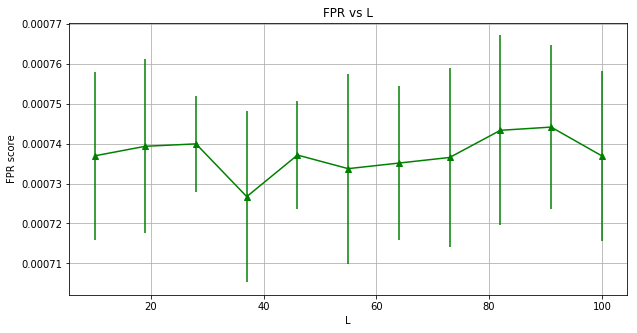

In [9]:
print('L=' , list_[8])

plt.subplots(figsize=(10, 5))
plt.errorbar(list_, mean[:,8], yerr=std[:,8], marker='^', color = 'g')

plt.grid(True)
plt.ylabel('FPR score')
plt.xlabel('L')
plt.title('FPR vs L')
plt.show()

p= 102


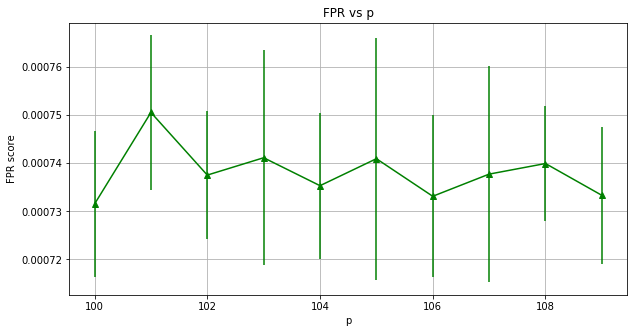

In [10]:
print('p=', primes_[2])

plt.subplots(figsize=(10, 5))
plt.errorbar(primes_, mean[2,:], yerr=std[2,:], marker='^', color = 'g')

plt.grid(True)
plt.ylabel('FPR score')
plt.xlabel('p')
plt.title('FPR vs p')
plt.show()

>Показать на эксперименте, что верхняя оценка на вероятность коллизии композиционного хеша для строк выполняется O(1/m + L/p). 
Мы ожидаем рост коллизий с увеличением длинны строк не быстрее линейного.

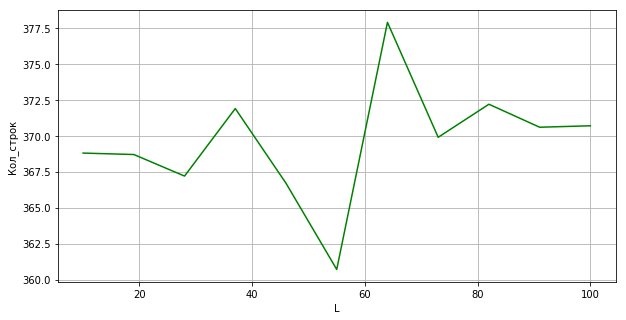

In [26]:
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(list_, [np.mean(el) for el in collisions[:,2]], color = 'g')
plt.xlabel('L')
plt.ylabel('Кол_строк')
plt.show()

Получившийся график, убрав некоторый шум, можно приблизить к линейному. То есть (с натяжкой) можно сказать, что количество коллизий с учеличением длины строк не растёт не быстрее линейного.

Кажется, это даже немного похоже на гиперболу:

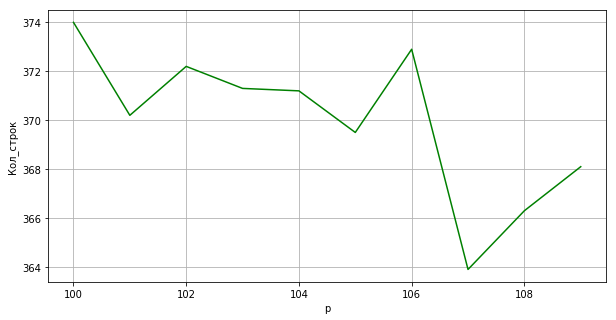

In [27]:
plt.figure(figsize=(10,5))
plt.grid(True)

plt.plot(primes_, [np.mean(el) for el in collisions[8,:]], color = 'g')
plt.xlabel('p')
plt.ylabel('Кол_строк')
plt.show()